# Part I - Ford GoBike System Data
## by Osama Badr

## Introduction
> Biking sharing system provided by Ford for the area of San Francisco Bay with information about the person, stations, time and duration of the ride that are interesting to go deep and explore some patterns in the data.


## Preliminary Wrangling
> This document explores data for Ford GoBike System about indvidual rides in the area of San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Loading FordGoBikes System Data

In [2]:
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition for Ford bikes
print(bikes.shape)
print(bikes.dtypes)
bikes.head(10)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


> There are incorrect types for start_station_id, end_station_id, bike_id,birth_year,start_time and end_time

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

>There are null values in member_birth_year

### Cleaning the data

In [5]:
# Copy the data before cleaning
df_bikes = bikes.copy()

In [6]:
# Get the number of records before cleaning of the rows
df_bikes.shape[0]

183412

### Define

Remove the null values also duplicates if existed

In [7]:
# Drop the duplicates and the null values
df_bikes = df_bikes[df_bikes['member_birth_year'].notnull()];
df_bikes.dropna(inplace=True)
df_bikes.drop_duplicates(inplace=True);

### Test

In [8]:
# Checking the count of null values in the whole dataset
print ('Count of null values in the data frame is : ', df_bikes.isnull().any().sum())
# Print the number of rows after cleaning
print ('Count of the new rows is :' ,df_bikes.shape[0])

Count of null values in the data frame is :  0
Count of the new rows is : 174952


### Define

Change the wrong type of the columns

In [9]:
# Changing the data types
df_bikes.start_station_id=df_bikes.start_station_id.astype(str);
df_bikes.end_station_id=df_bikes.end_station_id.astype(str);
df_bikes.bike_id=df_bikes.bike_id.astype(str);
df_bikes.member_birth_year=df_bikes.member_birth_year[:-2].astype('int64');
df_bikes['start_time'] = pd.to_datetime(df_bikes['start_time'])
df_bikes['end_time'] = pd.to_datetime(df_bikes['end_time'])

### Test

In [10]:
# Get the info for the series inside the dataframe with the correct type
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

### What is the structure of your dataset?

> 174952 rows of indvidual rides with 16 features (duration_sec, start_time, end_time, start_station_id,start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip).
>
> The data is combined between qualitative data and quantative data. 
>
> Several info about the persona demography or details about travel start and end points

### What is/are the main feature(s) of interest in your dataset?

> The pattern for lots rides and their relation with person, places, date and time, also the relationship between these features and each other.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Date and time ,Stations also the age will have high impact on the number of rides. 

## Univariate Exploration

> Which feature is the source for several rides

##### Making function with descriptive name for further easy usage

In [11]:
# Make function that replace title, label and title
def plot_info (title,x_label,y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

### User Analysis

What is the percentage of rides of each gender?

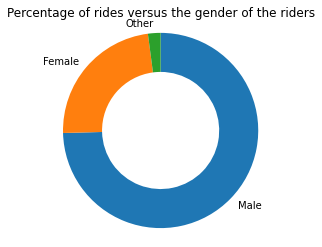

In [12]:
# Explore the contributions of gender in the bikes sharing 
sorted_counts = df_bikes['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,wedgeprops = {'width' : 0.4});
plt.axis('square');
plot_info('Percentage of rides versus the gender of the riders','','');

> The male has the highest number of rides as expected but seems that a good portion of females that have several rides.

What is the most dominant model of users , is it customer use the bike for one time user or frequent user?

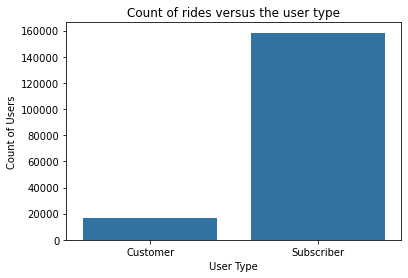

In [13]:
# plotting user_type on simple bar chart
base_color = sb.color_palette()[0]
sb.countplot(data = df_bikes, x = 'user_type', color = base_color);
plot_info('Count of rides versus the user type','User Type','Count of Users');

> It seems clearly that the model has major of users as subscriber. which I think is good for bike sharing system as this enusres that that most probably the user will use the system several times.

Is there a preference for the riders for specific bike or model?

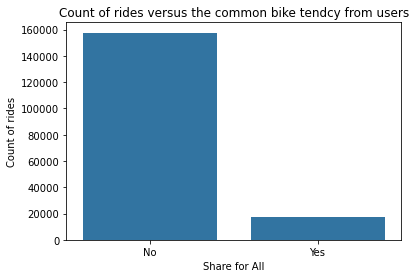

In [14]:
# plotting the bike sharinng for all trip on simple bar chart
sb.countplot(data = df_bikes, x = 'bike_share_for_all_trip', color = base_color);
plot_info('Count of rides versus the common bike tendcy from users','Share for All','Count of rides');

We can figure that the major is using any bike for the trip

### Station Analysis

#### Most Popular

What is the most Popular start station and how frquent is it?

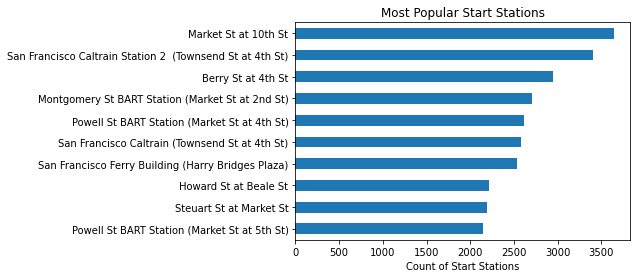

In [15]:
# Exploring the most popular start station through horizontal bar chart
df_bikes.start_station_name.value_counts(ascending=True).tail(10).plot.barh(color = base_color);
plot_info('Most Popular Start Stations','Count of Start Stations','');

> Market St at 10th St has the most frequent rides as an start point with more than 3500 rides.

What is the most Popular end station and how frquent is it?

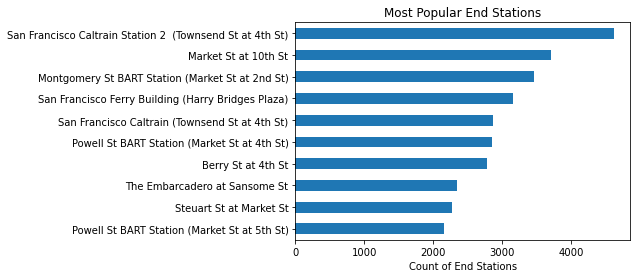

In [16]:
# Exploring the most popular end station through horizontal bar chart
df_bikes.end_station_name.value_counts(ascending=True).tail(10).plot.barh(color = base_color);
plot_info('Most Popular End Stations','Count of End Stations','');

> San Francisco Caltraion Station 2 has the most frequent rides as an end point with more than 4000.

#### Least Popular

What is the Least Popular start station and how frquent is it?

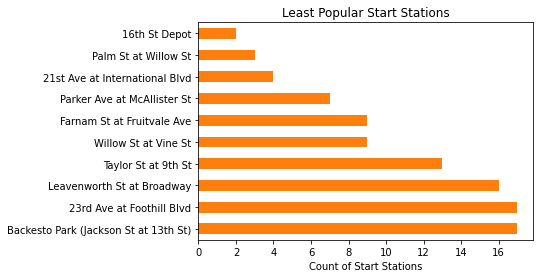

In [17]:
# Exploring the least popular start station through horizontal bar chart
df_bikes.start_station_name.value_counts(ascending=False).tail(10).plot.barh(color =sb.color_palette()[1]);
plot_info('Least Popular Start Stations','Count of Start Stations','');

> 16th  St Depot has the least frequent rides as an start point with only 2 rides.

What is the most Popular end station and how frquent is it?

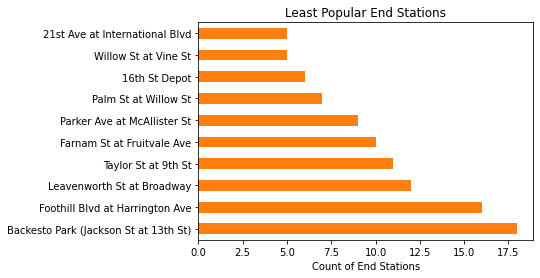

In [18]:
# Exploring the least popular end station through horizontal bar chart
df_bikes.end_station_name.value_counts(ascending=False).tail(10).plot.barh(color =sb.color_palette()[1]);
plot_info('Least Popular End Stations','Count of End Stations','');

> Willow St at Vine St has the least frequent rides as an end point with only 5 rides.

In [19]:
# Generating Age column drived from the birth date
df_bikes['Age'] = 2023 - df_bikes.member_birth_year

In [20]:
# Explore the values inside the age
df_bikes['Age'].unique()

array([ 39.,  51.,  34.,  49.,  64.,  40.,  35.,  31.,  27.,  30.,  33.,
        42.,  48.,  45.,  32.,  26.,  37.,  23.,  41.,  28.,  43.,  50.,
        38.,  52.,  44.,  56.,  25.,  29.,  46.,  24.,  36.,  54.,  60.,
        47.,  59.,  58.,  62.,  55.,  57.,  61.,  69.,  65.,  63.,  53.,
        67.,  66.,  78., 123.,  71.,  75.,  72.,  82.,  73.,  74.,  70.,
        68.,  77.,  76.,  92.,  80.,  81., 103.,  90.,  22., 145., 122.,
        79.,  95.,  89.,  84.,  93., 121., 113.,  85.,  96.,  nan])

Note that nan value existed with also ages above 70 years old which is not logical to" find in reality so I will neglect these rows

In [21]:
# Count the rows before the cleaning
df_bikes.shape[0]

174952

In [22]:
# Removing the unlogic rows with age more than 70 and strill use bike for transport
df_bikes = df_bikes[df_bikes['Age']< 70]

In [23]:
# Check the code and get the new count of rows of data
df_bikes.shape[0]

173571

In [24]:
# Getting the number of unique values to determine the graph that will be used for furhter analysis
df_bikes['Age'].nunique()

48

Since we have 48 different ages it will be hard to visualize all of them, I will show top 6 ages only taking into consideration that classification these ages in bins to be three different groups e.g. Young, Mid-Age , Old would be good solution.

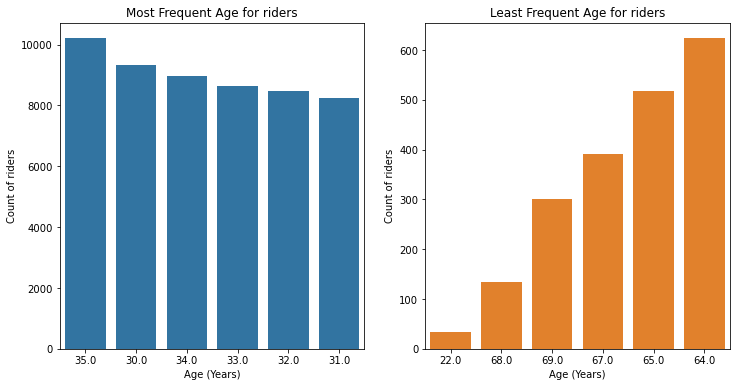

In [25]:
# Exploring the age that have most and least riders side by side 
plt.figure(figsize = [12, 6])
# Subplot 1: Most Frquent Age
plt.subplot(1,2,1)
Max_Age_counts = df_bikes['Age'].value_counts().head(6)
Max_Age_order = Max_Age_counts.index
sb.countplot(data = df_bikes, x = 'Age', color = base_color, order = Max_Age_order);
plot_info('Most Frequent Age for riders','Age (Years)','Count of riders');

# Subplot 2: Least Frquent Age
plt.subplot(1,2,2)
Least_Age_counts = df_bikes['Age'].value_counts(ascending = True).head(6)
Least_Age_order = Least_Age_counts.index
sb.countplot(data = df_bikes, x = 'Age', color = sb.color_palette()[1], order = Least_Age_order);
plot_info('Least Frequent Age for riders','Age (Years)','Count of riders');

> Most rides are youth with age range of 30 to 35 , the max number of rides source is the people with age 35 years old.

> Least rides are old with age range of 64 to 69 , the least number of rides source is the people with age 22 years old.

### Duration Analysis

What is distribution of the duration for the rides?

In [26]:
# Checking the duration column before plotting
df_bikes['duration_sec'].describe()

count    173571.000000
mean        703.890373
std        1646.545200
min          61.000000
25%         323.000000
50%         510.000000
75%         788.000000
max       84548.000000
Name: duration_sec, dtype: float64

It seems that max value is outliter, so I will negelect outliers that are the values that above (1.5* IQR+Q3) = 1485 so let the upper limit is 1500

In [27]:
# Select the rows only that are less than 1500 seconds
df_bikes = df_bikes[df_bikes['duration_sec']<= 1500]

In [28]:
# Verify that the code works well, also exploring the statistics for the column after cleaning.
df_bikes['duration_sec'].describe()

count    164507.000000
mean        551.085255
std         305.221916
min          61.000000
25%         314.000000
50%         489.000000
75%         732.000000
max        1500.000000
Name: duration_sec, dtype: float64

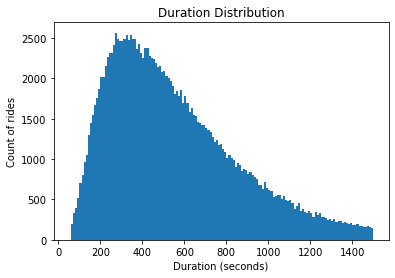

In [29]:
# Exploring the duration distribution
binsize = 10
bins = np.arange(50, df_bikes['duration_sec'].max()+binsize, binsize)
plt.hist(data = df_bikes, x = 'duration_sec', bins=bins, color = base_color)
plot_info('Duration Distribution','Duration (seconds)','Count of rides');

The distribution seems that it is right skewed, the most frequent value is about five minutes, so the bikes seems it is used mainly for short rides.

### Datetime Analysis

In [30]:
# Extract the month, day and hours from the start time
# Note that year and the month is the same in the whole data set so it will be meaningless to extract
df_bikes['start_day'] = df_bikes['start_time'].dt.day_name()
df_bikes['hour'] = df_bikes['start_time'].dt.hour

In [31]:
df_bikes['start_day'].value_counts()

Thursday     32031
Tuesday      29212
Wednesday    27173
Friday       26174
Monday       24189
Saturday     12892
Sunday       12836
Name: start_day, dtype: int64

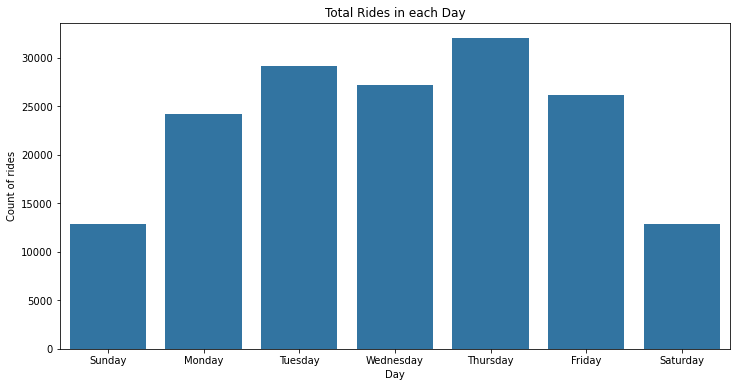

In [32]:
# Plotting the days with count of rides each day
day_name = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.figure(figsize=(12,6))
sb.countplot(data=df_bikes, x='start_day', order=day_name, color=base_color);
plot_info('Total Rides in each Day','Day','Count of rides');

> Thurday have the most of the rides while the start of the work day seems to have the least number of rides in the weekend on Saturday

Hour analysis during the day

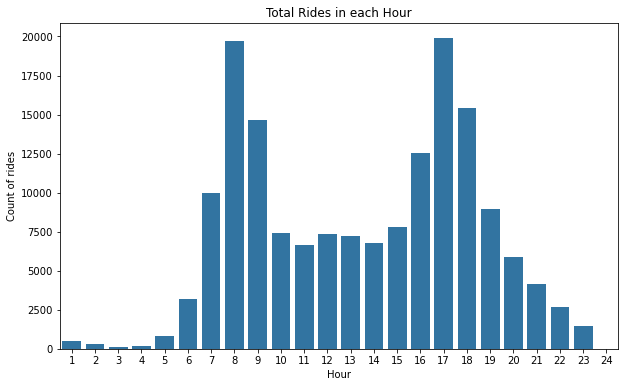

In [33]:
# Plotting the days with count of rides each hour
hour = np.arange(1,25)
plt.figure(figsize=(10,6))
sb.countplot(data=df_bikes, x='hour', order=hour, color=base_color)
plot_info('Total Rides in each Hour','Hour','Count of rides');

> Bimodel with two peaks

> The peak hours in the start hours of the day at 8 A.M also seems to be after the working hours at 5 P.M

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Lot of them:
    >> Data type change for  date and time
    >>
    >>Remove null values and outliers from whole dataset and specific from Birth of date to calculate the age
    >>
    >>Extract two columns from one column for date and time column
    >>
    >> Feature enigneering for new variable that is age derived from Birth date

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Similar to the previous:
    >> Remove outliers for the duration in seconds.
    >>
    >>Change the data type for several variables like duration just in case of usage.

## Bivariate Exploration

### Gender and Age Analysis 

What is the age most and least frequent ages for each gender?

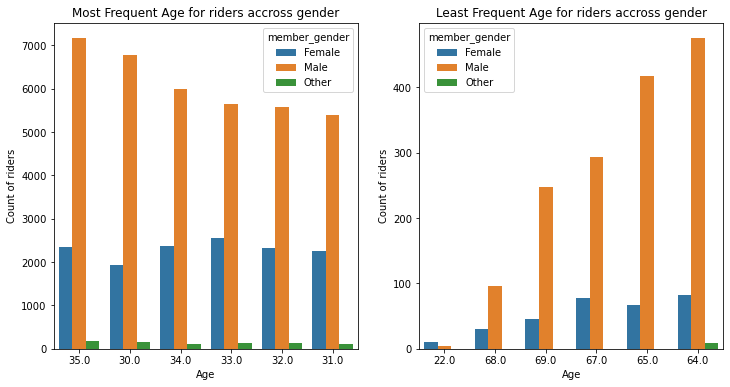

In [34]:
plt.figure(figsize = [12, 6])
# Subplot 1: Most Frquent Age with the relation of gender
plt.subplot(1,2,1)
Max_Age_counts = df_bikes['Age'].value_counts().head(6)
Max_Age_order = Max_Age_counts.index
sb.countplot(data = df_bikes, x = 'Age',hue = 'member_gender', order = Max_Age_order);
plot_info('Most Frequent Age for riders accross gender','Age','Count of riders');

# Subplot 2: Least Frquent Age with the relation of gender
plt.subplot(1,2,2)
Least_Age_counts = df_bikes['Age'].value_counts(ascending = True).head(6)
Least_Age_order = Least_Age_counts.index
sb.countplot(data = df_bikes, x = 'Age', hue = 'member_gender', order = Least_Age_order);
plot_info('Least Frequent Age for riders accross gender','Age','Count of riders');

> The most frequent age for male is 35 while it is 33 in women.

> The most frequent age for female is almost the same of range of 30 to 35

>The least frequent age for male and female is 22 .

>The pattern of age for male and female is almost the same for the least age. it seems to be old does not care for your gender it will be hard to use bike for you as transportation method.

### User Type and Age analysis

What is the age most and least frequent ages for each gender?

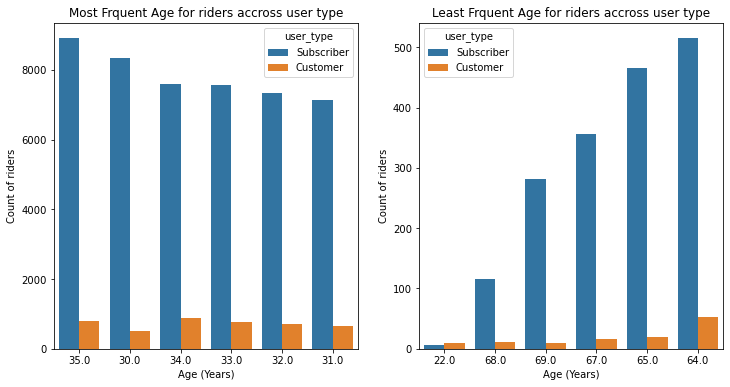

In [35]:
plt.figure(figsize = [12, 6])
# Subplot 1: Most Frquent Age with the relation of gender
plt.subplot(1,2,1)
Max_Age_counts = df_bikes['Age'].value_counts().head(6)
Max_Age_order = Max_Age_counts.index
sb.countplot(data = df_bikes, x = 'Age',hue = 'user_type', order = Max_Age_order);
plot_info('Most Frquent Age for riders accross user type','Age (Years)','Count of riders');

# Subplot 2: Least Frquent Age with the relation of gender
plt.subplot(1,2,2)
Least_Age_counts = df_bikes['Age'].value_counts(ascending = True).head(6)
Least_Age_order = Least_Age_counts.index
sb.countplot(data = df_bikes, x = 'Age', hue = 'user_type', order = Least_Age_order);
plot_info('Least Frquent Age for riders accross user type','Age (Years)','Count of riders');

> Quick note that the for the most frequent rides the highest count is reflected to age for customer is 34 and almost the same for the rest for 31 til 35 years old

> For the least frequent rides the least is reflected to age for customer is 22 years old.

### Duration analysis for each gender

Deep exploration in the relation between the duration for the riders and the gender

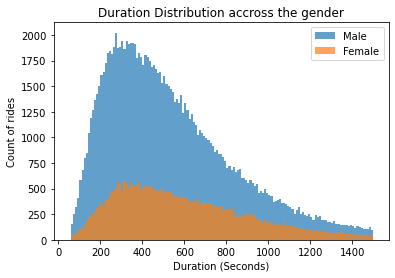

In [36]:
# Exploring the duration distribution
binsize = 10
bins = np.arange(50, df_bikes['duration_sec'].max()+binsize, binsize)
plt.hist(data = df_bikes[df_bikes['member_gender'] == 'Male'], x = 'duration_sec', bins=bins, color = base_color,alpha=0.7,label = 'Male')
plt.hist(data = df_bikes[df_bikes['member_gender'] == 'Female'], x = 'duration_sec', bins=bins, color =sb.color_palette()[1],alpha=0.7 , label = 'Female')
plt.legend();
plot_info('Duration Distribution accross the gender','Duration (Seconds)','Count of rides');

> The distribution seems that it is right skewed for both male and female but for males it seems the curve is more right skewed so it is shown that the males usually spend more time in the spend relative to females.

To double check with the result I will use code 

In [37]:
# Check the skew for each gender
print('Skewness factor for the duration distribution for Female: ' ,df_bikes[df_bikes['member_gender'] == 'Female'].duration_sec.skew())
print('Skewness factor for the duration distribution for Male: ' ,df_bikes[df_bikes['member_gender'] == 'Male'].duration_sec.skew())

Skewness factor for the duration distribution for Female:  0.6884179985442543
Skewness factor for the duration distribution for Male:  0.8761361828868516


### Duration analysis for each user type

Deep exploration in the relation between the duration for the riders and the gender

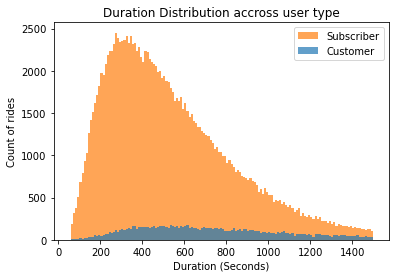

In [38]:
# Exploring the duration distribution
binsize = 10
bins = np.arange(50, df_bikes['duration_sec'].max()+binsize, binsize)
plt.hist(data = df_bikes[df_bikes['user_type'] == 'Subscriber'], x = 'duration_sec', bins=bins, color =sb.color_palette()[1],alpha=0.7 , label = 'Subscriber')
plt.hist(data = df_bikes[df_bikes['user_type'] == 'Customer'], x = 'duration_sec', bins=bins, color = base_color,alpha=0.7,label = 'Customer')
plt.legend();
plot_info('Duration Distribution accross user type','Duration (Seconds)','Count of rides');

> The distribution seems that it is right skewed for both customer and subscriber but for subscriber it seems the curve is high right skewed so it is shown that the subscriber usually spend more time in the spend relative to Customer.

To double check with the result I will use code 

In [39]:
# Check the skew for each user type
print('Skewness factor for the duration distribution for Subscriber: ',df_bikes[df_bikes['user_type'] == 'Subscriber'].duration_sec.skew())
print('Skewness factor for the duration distribution for Customer: ',df_bikes[df_bikes['user_type'] == 'Customer'].duration_sec.skew())

Skewness factor for the duration distribution for Subscriber:  0.8641887020269535
Skewness factor for the duration distribution for Customer:  0.3949071053035941


### Datetime Analysis for each gender

What is the most frequent day for rides for males and females?

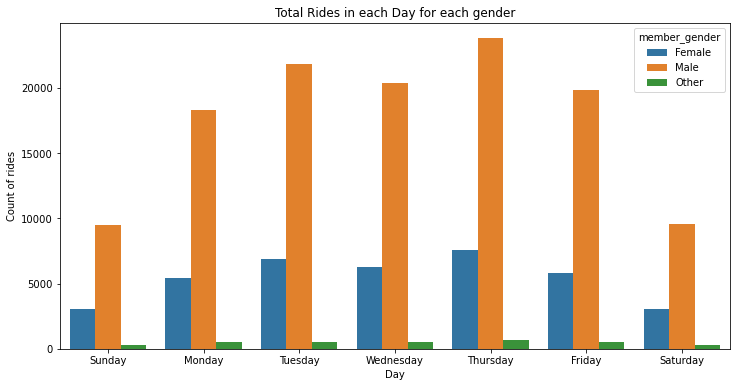

In [40]:
# Plotting the days with count of rides each day for each gender
day_name = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.figure(figsize=(12,6))
sb.countplot(data=df_bikes, x='start_day', order=day_name,hue = 'member_gender');
plot_info('Total Rides in each Day for each gender','Day','Count of rides');

> The pattern is the same for the male and female

### Datetime Analysis for each gender

What is the most frequent hour for rides for males and females?

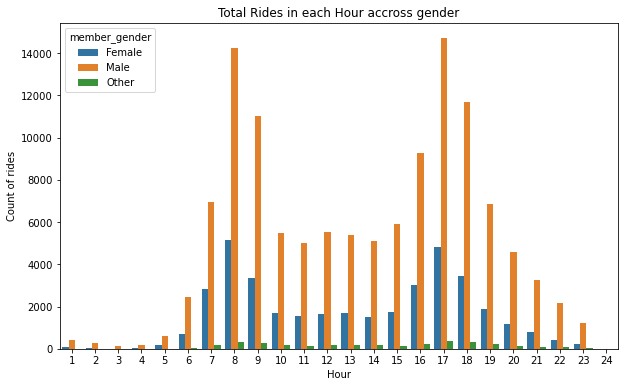

In [41]:
# Plotting the days with count of rides each hour for each gender
hour = np.arange(1,25)
plt.figure(figsize=(10,6))
sb.countplot(data=df_bikes, x='hour', order=hour, hue = 'member_gender');
plot_info('Total Rides in each Hour accross gender','Hour','Count of rides');

> The pattern is the same for the male and female

### Datetime Analysis for each user type

What is the most frequent day for rides for customers and subscribers?

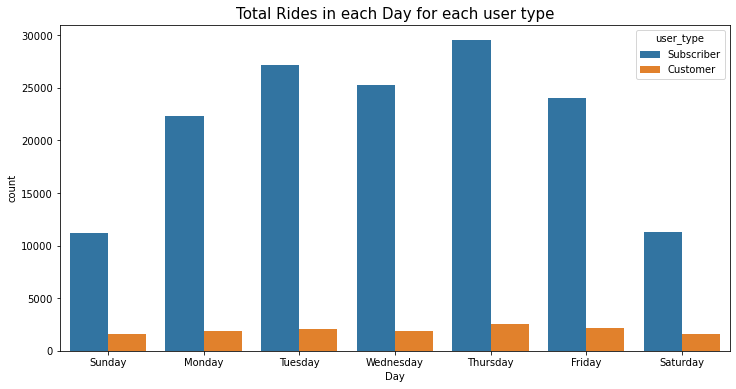

In [42]:
# Plotting the days with count of rides each day for each user type
day_name = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.figure(figsize=(12,6))
sb.countplot(data=df_bikes, x='start_day', order=day_name,hue = 'user_type');
plt.title('Total Rides in each Day for each user type',fontsize=15);

> The pattern is the same for subscriber and customer

### Datetime Analysis for each user type

What is the most frequent hour for rides for each user type?

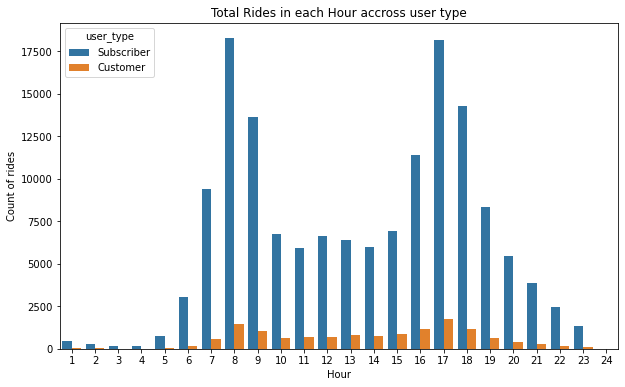

In [43]:
# Plotting the days with count of rides each hour for each gender
hour = np.arange(1,25)
plt.figure(figsize=(10,6))
sb.countplot(data=df_bikes, x='hour', order=hour, hue = 'user_type');
plot_info('Total Rides in each Hour accross user type','Hour', 'Count of rides');

> The pattern is the same for subscriber and customer

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The most frequent rides source from the male with age of 35 while the age is 33 for the female has the highest rides as a count.

> The skewness in the duration across the gender was interesting to mark. So we can notice that male spend more duration in the ride than the female.

> The skewness in the duration across the user type was interesting to notice as well. So we can notice that subscriber spend more duration in the ride than the customer.

> Both of gender or user type does not have impact or change in the peak days or the peak hours, the pattern is the same.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Till now no.

## Multivariate Exploration

### Duration analysis accross the gender and user type

What is the distribution for the duration accross gender and user ?

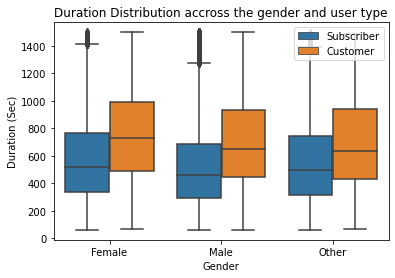

In [44]:
# Plotting box plot diagram for the distribution of the duration between gender and user
sb.boxplot(data = df_bikes, y = 'duration_sec', hue = 'user_type',x = 'member_gender')
plt.legend(loc='upper right');
plot_info('Duration Distribution accross the gender and user type','Gender','Duration (Sec)');

> Female Customer tends to have duration in the rides more than the other genders and types combinations.

> Male Subscriber tends to have duration in the rides less than the other genders and types combinations.

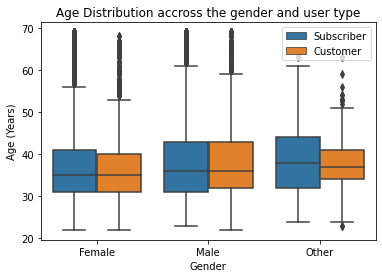

In [45]:
# Plotting box plot diagram for the distribution of the Age between gender and user
sb.boxplot(data = df_bikes, y = 'Age', hue = 'user_type',x = 'member_gender')
plt.legend(loc='upper right');
plot_info('Age Distribution accross the gender and user type','Gender','Age (Years)');

> distribution is almost the same for male and females accross the different user types.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Female Customer tends to have duration in the rides more than the other genders and types combinations.

> Male Subscriber tends to have duration in the rides less than the other genders and types combinations.

## Conclusions
> About 75% of riders are males.

> The major of riders are subscribers.

> Market St at 10th St has the most frequent rides as an start point with more than 3500 rides.

> San Francisco Caltraion Station 2 has the most frequent rides as an end point with more than 4000.

> 16th St Depot has the least frequent rides as an start point with only 2 rides.

> Willow St at Vine St has the least frequent rides as an end point with only 5 rides.

> Most rides are youth with age range of 30 to 35 , the max number of rides source is the people with age 35 years old.

>> The most frequent age for male is 35 while it is 33 in women.

>> The most frequent age for female is almost the same of range of 30 to 35

>> The most frequent rides the highest count is reflected to age for customer is 34 and almost the same for the rest for 31 til 35 years old

> Least rides are old with age range of 64 to 69 , the least number of rides source is the people with age 22 years old.

>> The least frequent age for male and female is 22 .

> The most frequent value for duration is about five minutes, Mainly riders seem to have rides for short rides.

>> The males usually spend more time in the spend relative to females.

>> The subscriber usually spend more time in the spend relative to Customer.

>> Female Customer tends to have duration in the rides more than the other genders and types combinations.

>> Male Subscriber tends to have duration in the rides less than the other genders and types combinations.

> Thurday have the most of the rides while the start of the work day seems to have the least number of rides in the weekend on Saturday

> The peak hours in the start hours of the day at 8 A.M  also seems to be after the working hours at 5 P.M 

## Refrences

> loading specific columns
https://www.geeksforgeeks.org/reading-specific-columns-of-a-csv-file-using-pandas/

> Check Skweness
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html

### Storing step

In [46]:
# Storing the cleaned file as csv
df_bikes.to_csv('bikes_master.csv',index = False)

## Thank You 